<a href="https://colab.research.google.com/github/Mickey5480/Data110-Fall2025/blob/main/week_7_in_class_pesentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pg=sns.load_dataset('penguins')
pg.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [17]:
pg.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


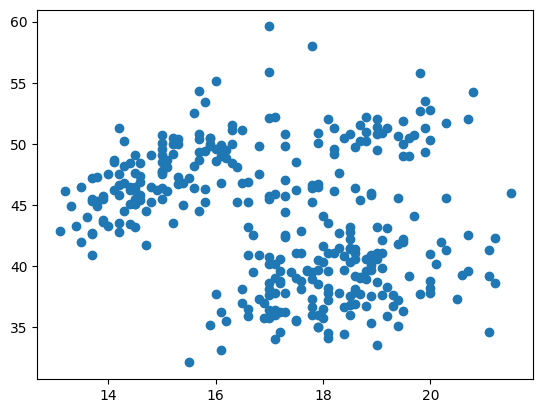

In [20]:
plt.scatter(pg['bill_depth_mm'],pg['bill_length_mm'])

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

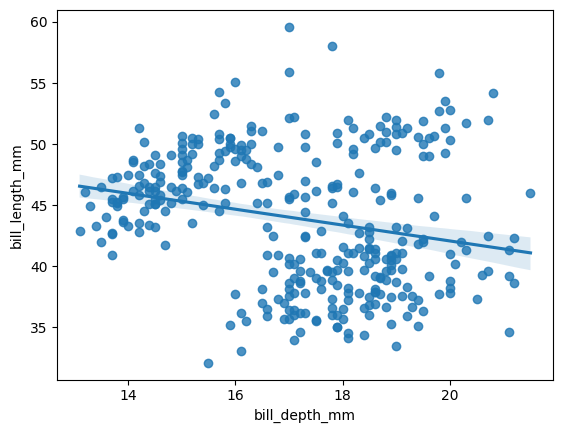

In [21]:
sns.regplot(x='bill_depth_mm',y='bill_length_mm',data=pg)

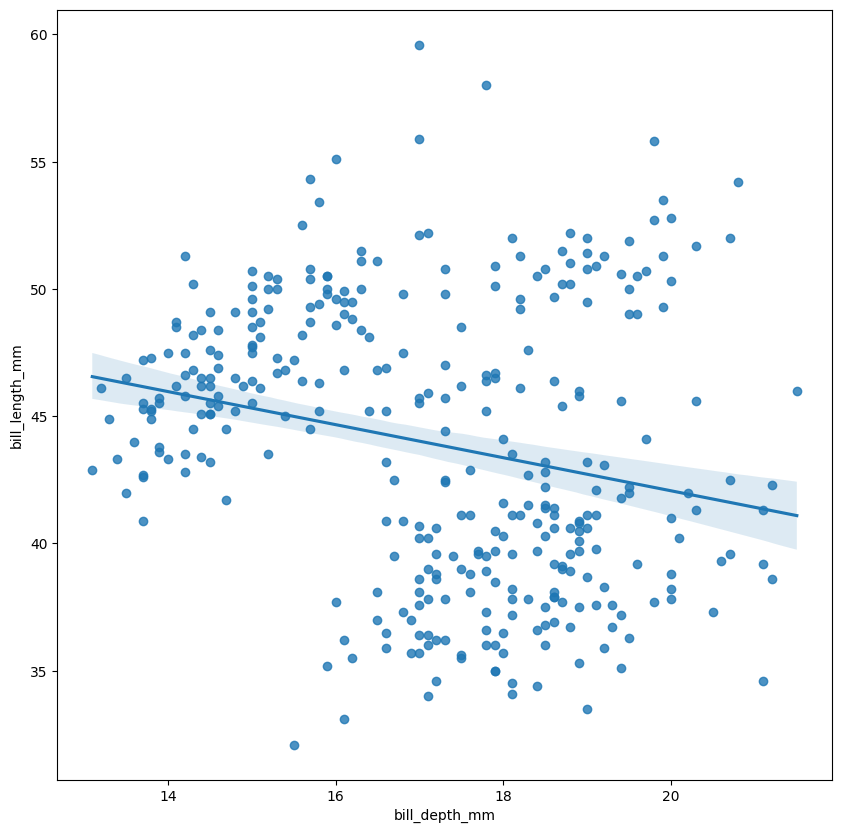

In [22]:
plt.figure(figsize=(10,10))
sns.regplot(x='bill_depth_mm',y='bill_length_mm',data=pg)
plt.show()

In [24]:
plt.figure(figsize=(10,10))
sns.regplot(x='bill_depth_mm',y='bill_length_mm',data=pg,hue="sex")
plt.show()

TypeError: regplot() got an unexpected keyword argument 'hue'

<Figure size 1000x1000 with 0 Axes>

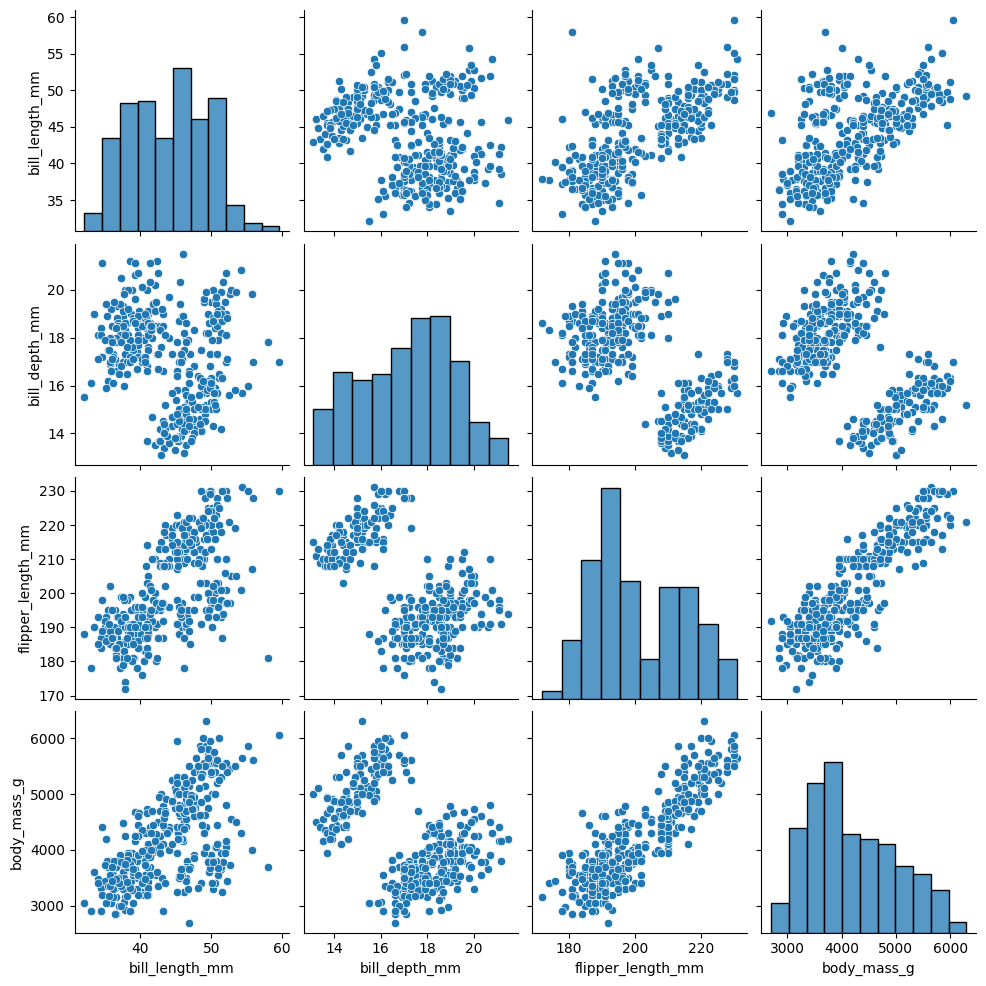

In [25]:
sns.pairplot(pg)

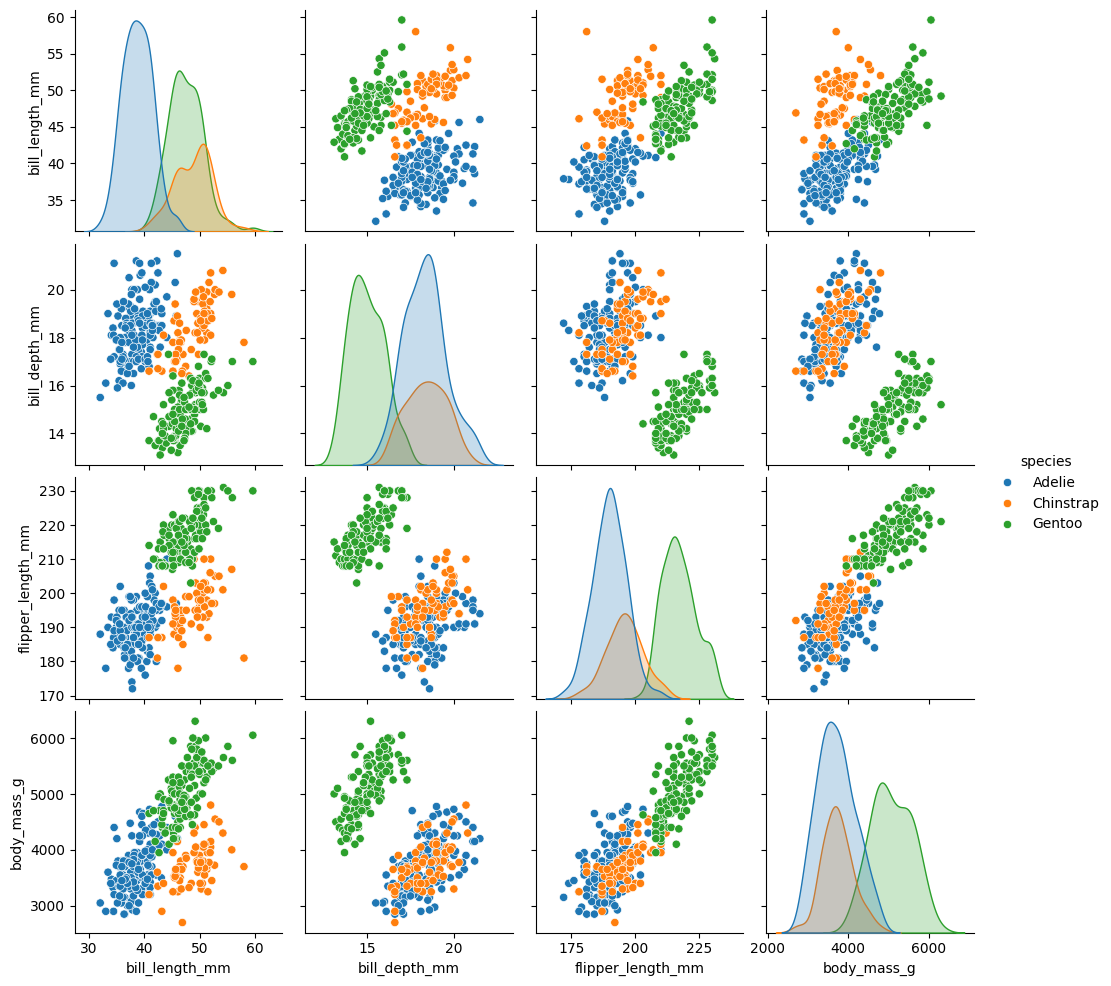

In [26]:
sns.pairplot(pg,hue='species')

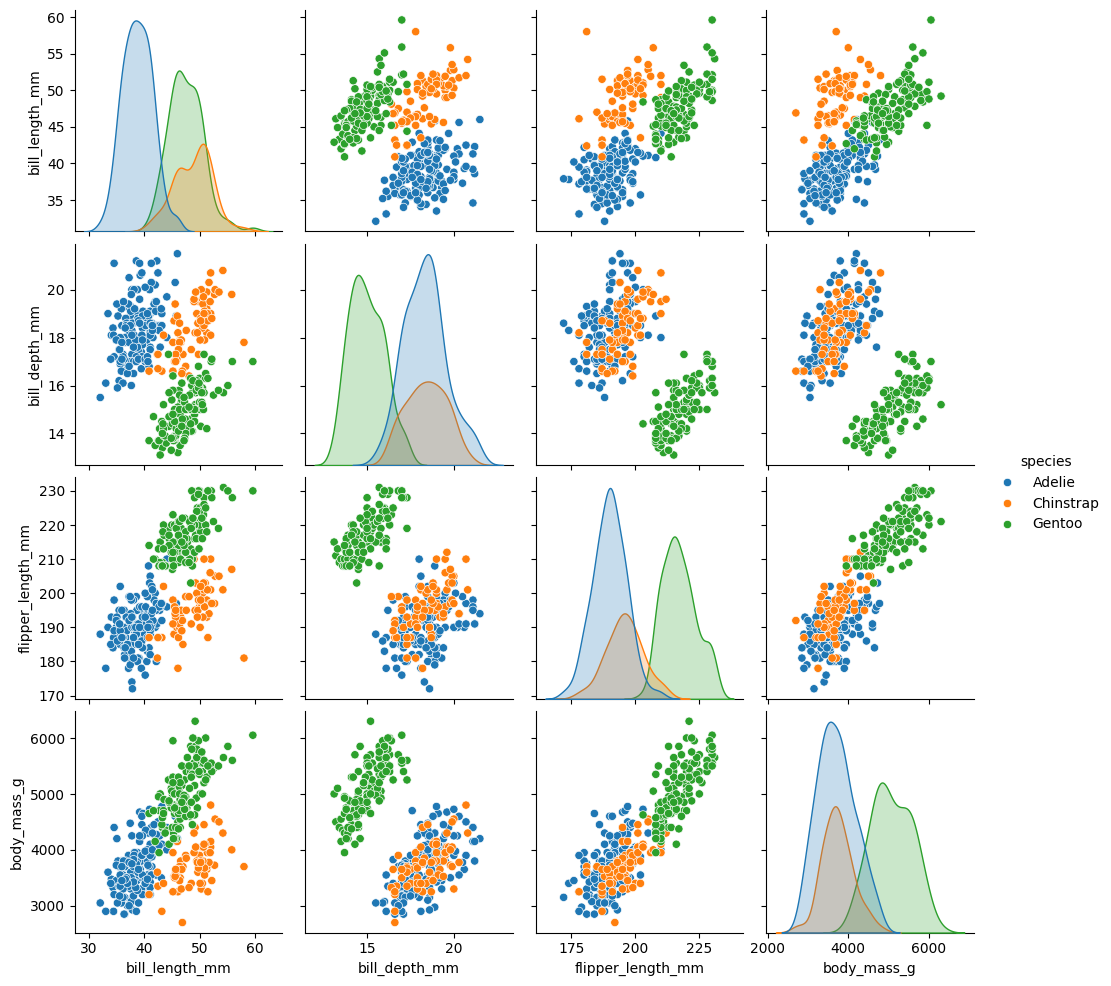

In [28]:
sns.pairplot(pg,diag_kind='kde',hue='species')
plt.show()

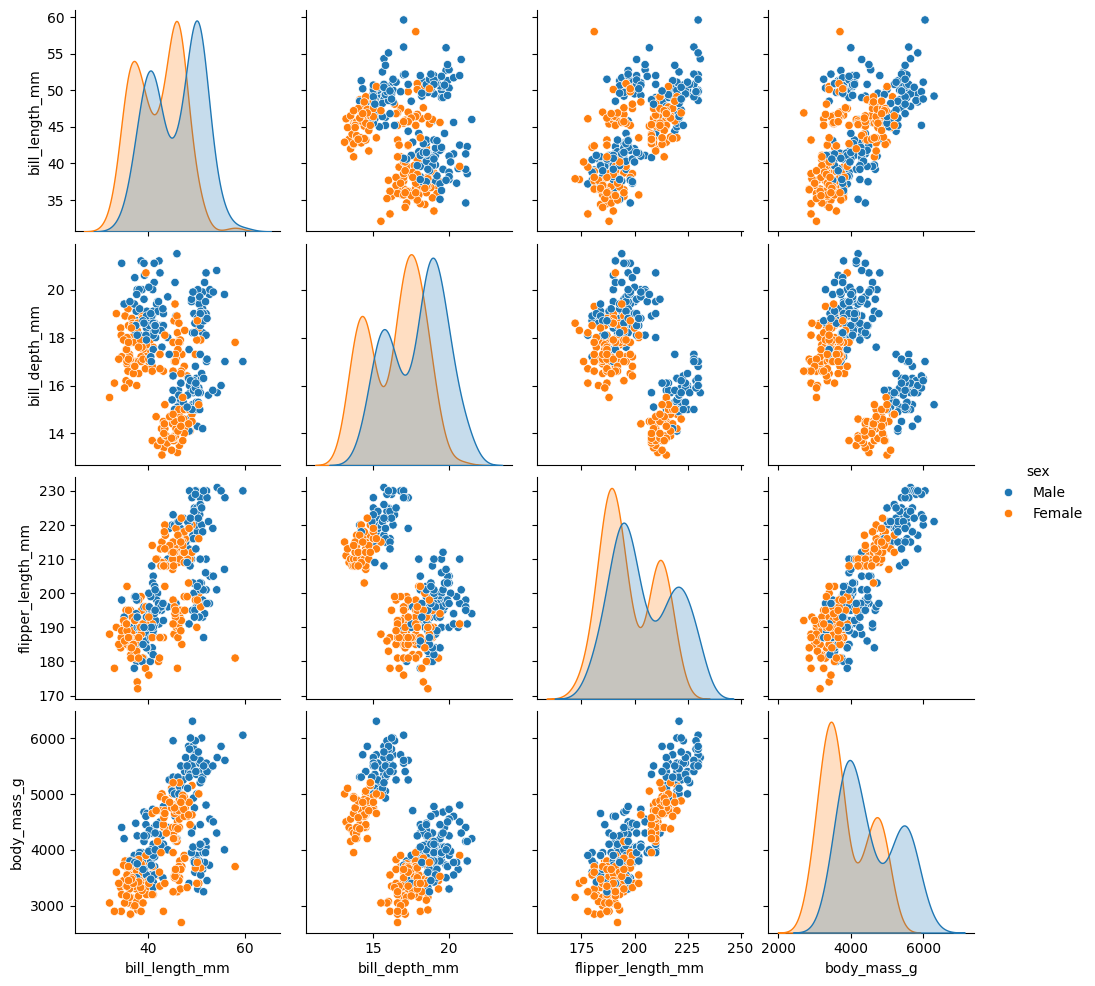

In [29]:
sns.pairplot(pg,diag_kind='kde',hue='sex')
plt.show()

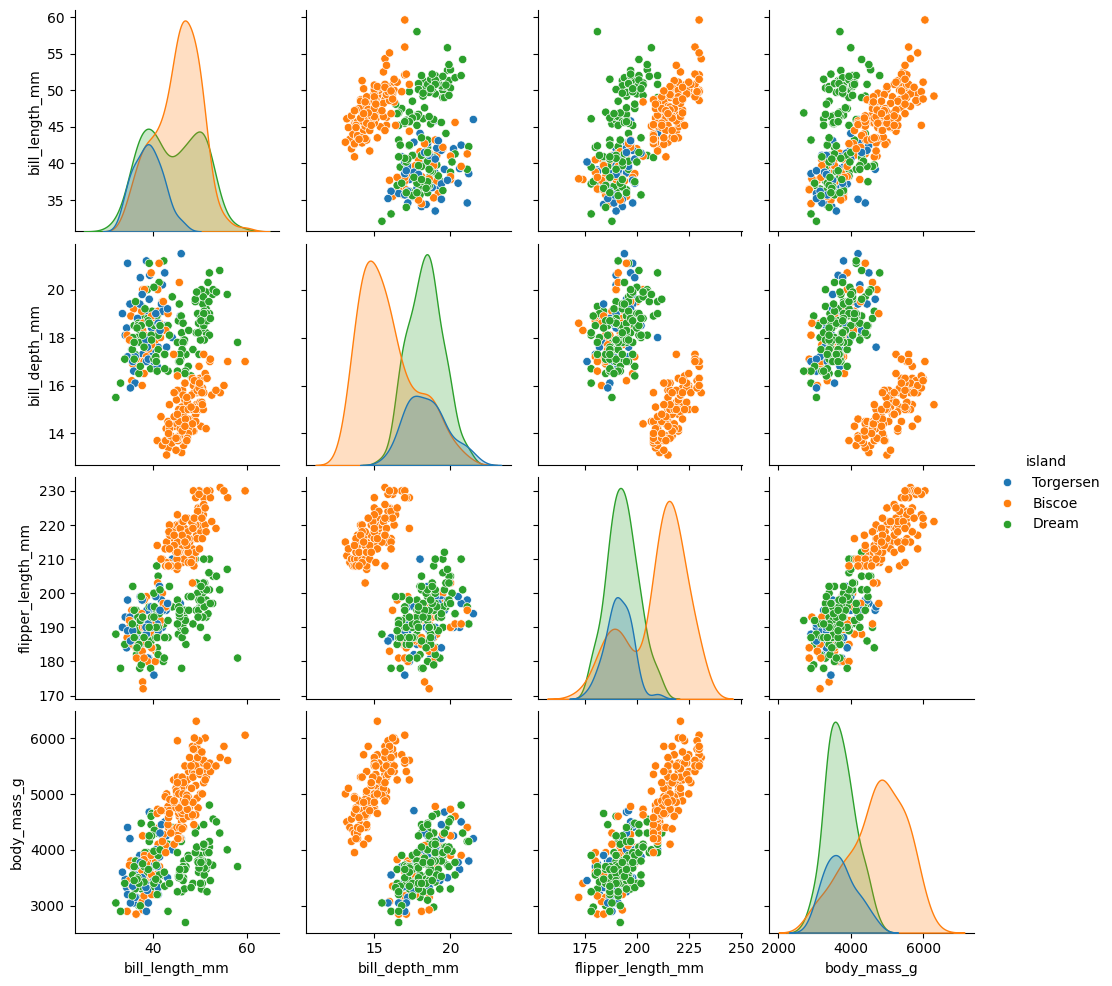

In [30]:
sns.pairplot(pg,diag_kind='kde',hue='island')
plt.show()

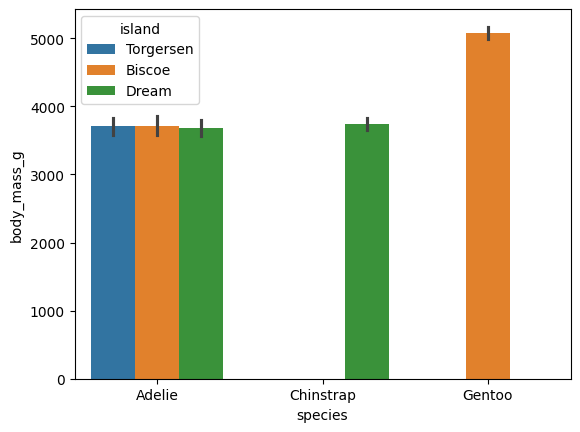

In [31]:
sns.barplot(x='species',y='body_mass_g',data=pg,hue='island')
plt.show()

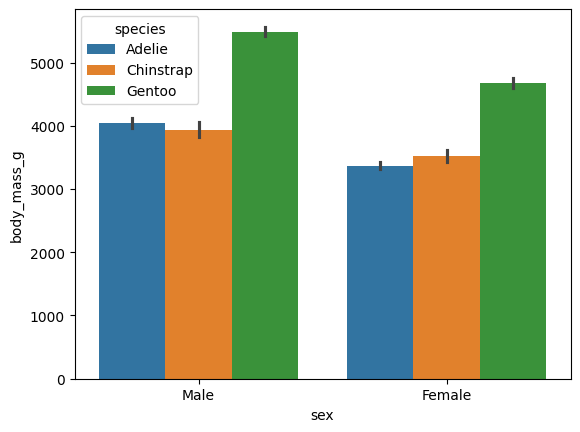

In [32]:
sns.barplot(x='sex',y='body_mass_g',data=pg,hue='species')
plt.show()

In [33]:
species_mean=pg.groupby('species')['body_mass_g'].mean() #this is called panda series
print(species_mean)

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


In [34]:
print(species_mean.index)

Index(['Adelie', 'Chinstrap', 'Gentoo'], dtype='object', name='species')


In [35]:
print(species_mean.values)

[3700.66225166 3733.08823529 5076.01626016]


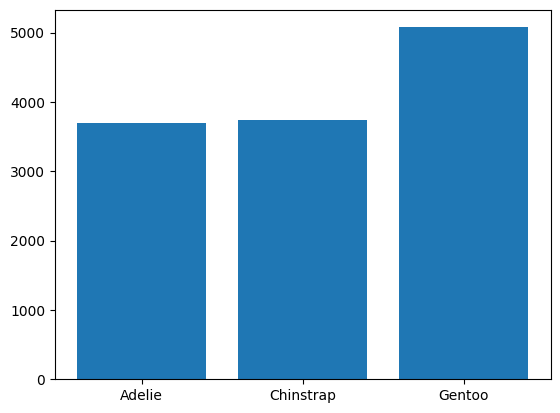

In [36]:
plt.bar(species_mean.index,species_mean.values)
plt.show()

In [37]:
species_max=pg.groupby('species')['body_mass_g'].mean() #this is called panda series
print(species_max)

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


In [39]:
print(pg.groupby('species')['body_mass_g'].count().index,pg.groupby('species')['body_mass_g'].count().values)

Index(['Adelie', 'Chinstrap', 'Gentoo'], dtype='object', name='species') [151  68 123]


In [ ]:
sns.barplot(x='species',y='body_mass_g',data=pg,hue='island')
plt.show()

In [40]:
species_sex_groupd=pg.groupby(['species','sex'])['body_mass_g'].mean()
print(species_sex_groupd)

species    sex   
Adelie     Female    3368.835616
           Male      4043.493151
Chinstrap  Female    3527.205882
           Male      3938.970588
Gentoo     Female    4679.741379
           Male      5484.836066
Name: body_mass_g, dtype: float64


In [42]:
species_sex_grouped=pg.groupby(['species','sex'])['body_mass_g'].mean().unstack()
print(species_sex_grouped)

sex             Female         Male
species                            
Adelie     3368.835616  4043.493151
Chinstrap  3527.205882  3938.970588
Gentoo     4679.741379  5484.836066


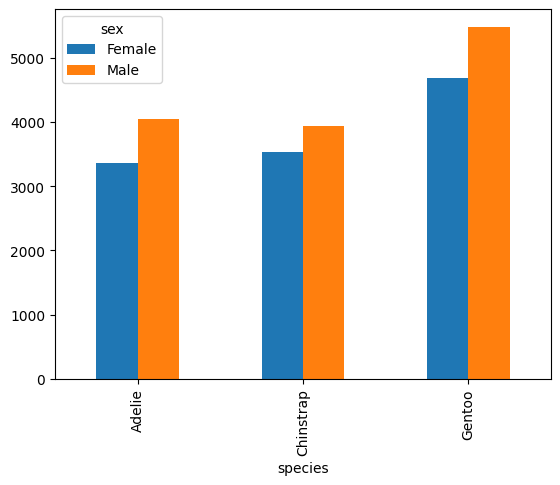

In [43]:
species_sex_grouped.plot(kind='bar') #You can use panda for data viz too!
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

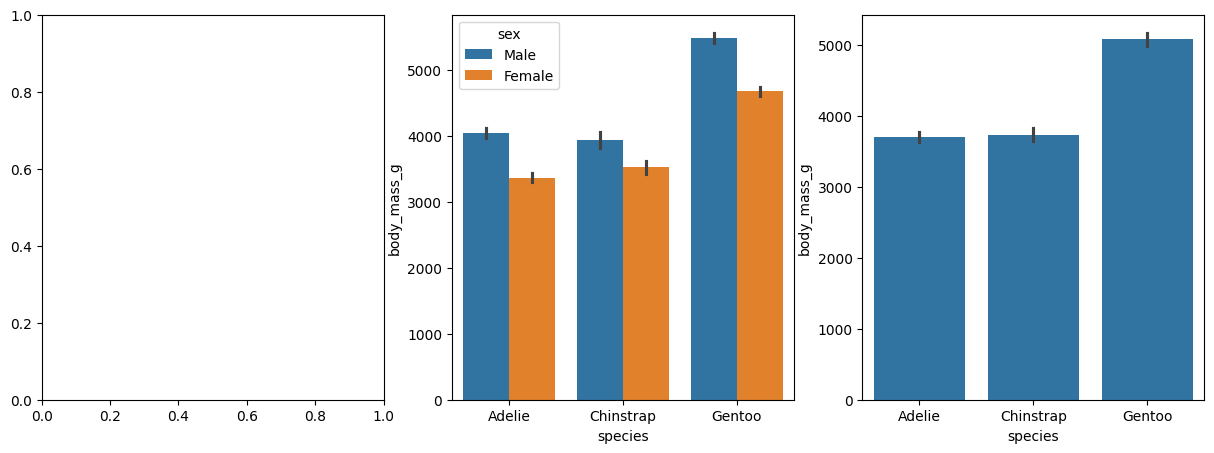

In [56]:
fig, axes=plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='species',y='body_mass_g',data=pg,ax=axes[2])
sns.barplot(x='species',y='body_mass_g',hue='sex',data=pg,ax=axes[1])
sns.barplot(x='species',y='body_mass_g',hue='island',data=pg,ax=axes[3])
plt.show()

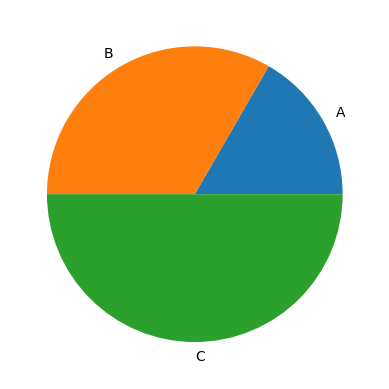

In [58]:
category=('A','B','C')
values=(10,20,30)
plt.pie(values,labels=category)
plt.show()

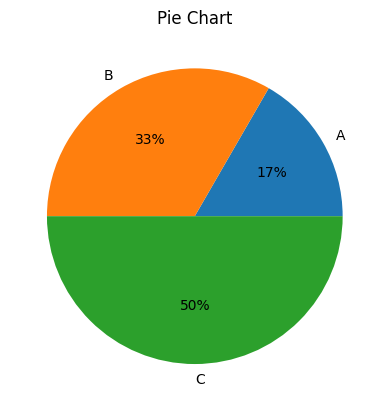

In [59]:
category=('A','B','C')
values=(10,20,30)
plt.pie(values,labels=category,autopct='%1.0f%%')
plt.title('Pie Chart')
plt.show()